In [ ]:
'''
Alejandro Fernández Trigo
'''

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Leemos la imagen en color verdadero generada en el ejercicio I (tiene que estar en /salida)!
imagen = cv.imread('salida/1_ColorVerdadero.jpg',cv.IMREAD_COLOR)

In [5]:
# Antes de cortehsv hace falta el corte de colas de la práctica II Ej 3; el mismo usado en esta práctica en el ejercicio I
# Función corte de la práctica II Ejercicio 3:
def corte(imagen, porcentaje):
    # Copia la imagen y calcula el histograma con OpenCV
    resultado = imagen.copy()
    hist = cv.calcHist([imagen], [0], None, [256], [0, 256])
        
    # Calculamos el nº de píxeles que quedan fuera en base al porcentaje:        
    pixeles = imagen.size
    total = pixeles * porcentaje
    valores = list(hist)
    
    n = 0
    # Recorrer el histograma para calcular Cmin:
    for i in range(1,256):
        n += valores[i]
        if n > total:
            cmin = i
            break
    
    n = 0
    # Recorrer el histograma para calcular Cmax:
    for i in range(255,0,-1):
        n += valores[i]
        if n > total:
            cmax = i
            break
    
    for i in range(resultado.shape[0]):
        for j in range(resultado.shape[1]):
            # ND0 = 0 si ND ≤ NDcortemin
            if resultado[i][j] < cmin:
                resultado[i][j] = 0
            # ND0 = 255 si ND ≥ NDcortemax
            elif resultado[i][j] > cmax:
                resultado[i][j] = 255
            else:
                # ND0ij = ND0min + (NDij − NDcortemin)·(ND0max − ND0min)/(NDcortemax − NDcortemin)
                resultado[i][j] = (0 + (imagen[i][j] - cmin) * (255 - 0) / ((cmax - cmin)))
    
    return resultado

In [6]:
# Función cortehsv
def cortehsv(imagen):

    # Transforme la combinacion (RGB) al dominio HSV.
    hsv = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)

    # Extraer las componentes del mapa hsv
    H, S, V = cv.split(hsv)
    
    # Realice un corte de colas de la componente S y de la componente V
    corte_S = corte(S, 0.01)
    corte_V = corte(V, 0.01)
    
    # Aplicar el corte a la imagen resultante; igual que el ejercicio I:
    imagen_corte_S = cv.merge((H, corte_S, V))
    imagen_corte_V = cv.merge((H, S, corte_V))
    imagen_corte_doble = cv.merge((H, corte_S, corte_V))
    
    # Transforme la imagen resultante (HSV) de nuevo al dominio RGB
    # Como he creado tres casos, devuelvo los tres:
    resultado_S = cv.cvtColor(imagen_corte_S, cv.COLOR_HSV2BGR)
    resultado_V = cv.cvtColor(imagen_corte_V, cv.COLOR_HSV2BGR)
    resultado_doble = cv.cvtColor(imagen_corte_doble, cv.COLOR_HSV2BGR)
    
    return resultado_S, resultado_V, resultado_doble   

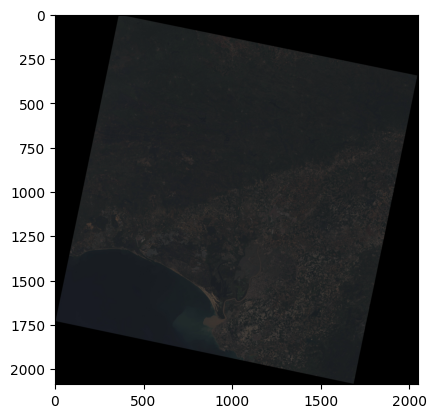

In [7]:
# Imagen original:
plt.imshow(imagen)

True

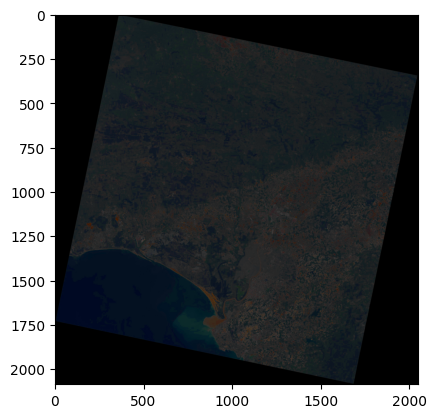

In [9]:
# Aplicar cortehsv a la imagen en la componente S:
corte_S, _, _ = cortehsv(imagen)
plt.imshow(corte_S)
cv.imwrite("salida/5_CorteComponenteS.jpg", corte_S)

True

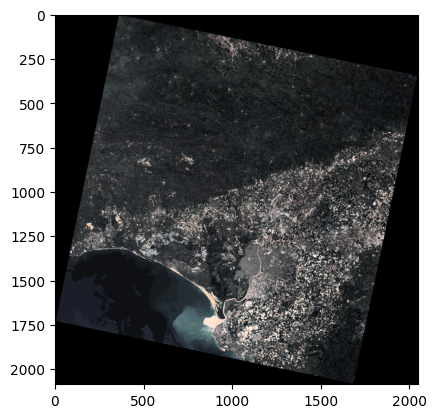

In [10]:
# Aplicar cortehsv a la imagen en la componente V:
_, corte_V, _ = cortehsv(imagen)
plt.imshow(corte_V)
cv.imwrite("salida/5_CorteComponenteV.jpg", corte_V)

True

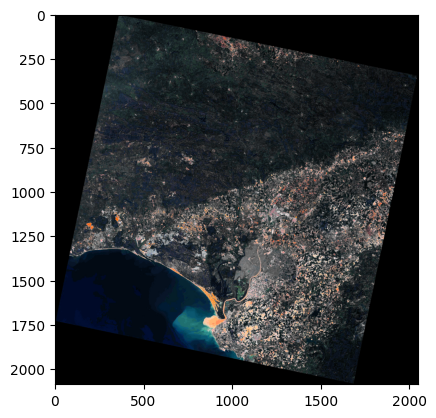

In [11]:
# Aplicar cortehsv a la imagen en ambas componentes:
_, _, corte_doble = cortehsv(imagen)
plt.imshow(corte_doble)
cv.imwrite("salida/5_CorteDoble.jpg", corte_doble)